In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
x, y = make_regression(n_samples=1000, n_features=10, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

**Regression Architecture**

In [3]:
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(10,)), # 10 features,
    layers.Dense(50, activation='relu'),
    layers.Dense(1) # Single output (regression)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Improving Regression Models**

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(10,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1),
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8893.0029 - mae: 65.6913     
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 577.8757 - mae: 17.5041  
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 90.1119 - mae: 7.2375 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.9307 - mae: 4.2859 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.9772 - mae: 3.6266 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.9637 - mae: 4.2483 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.7163 - mae: 3.1147 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.7436 - mae: 2.9671 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.3617 - mae: 2.5476
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7803 - mae: 2.0442 


**Evaluating Regression Models**

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


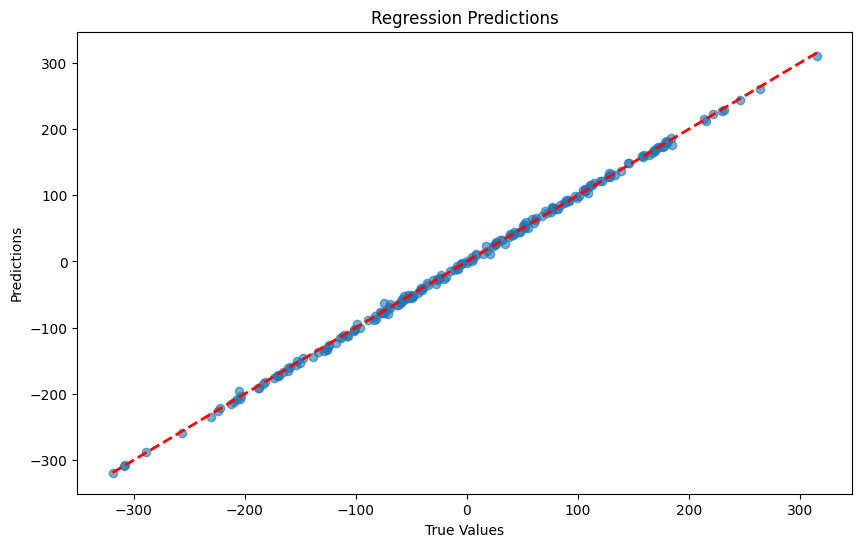

In [7]:
predictions = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Predictions')
plt.show()

In [11]:
train_loss, train_mae = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")

Train MAE: 1.8124, Test MAE: 2.5725
